# Polynomial Regression Model

change size of the test subset

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## read data base

In [2]:
data = pd.read_csv('CLEANED_sobolsampling-2048.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#data = data.transpose()
#print(f'{data}')

## prepare data

In [10]:
X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')
sizes = np.arange(0.01, 1.0, 0.01, dtype=float)
#print(f'{sizes}')
X_TRAINs = []
X_TESTs = []
Y_TRAINs = []
Y_TESTs = []
for size in sizes:
    # create 30 different sets (using different random_states) for each test/train quotient
    THISXTrain = []
    THISXTest = []
    THISYTrain = []
    THISYTest = []
    for i in range(0,30):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size.round(2))#, random_state=29)
        THISXTrain.append(X_train)
        THISXTest.append(X_test)
        THISYTrain.append(Y_train)
        THISYTest.append(Y_test)
        
    X_TRAINs.append(THISXTrain)
    X_TESTs.append(THISXTest)
    Y_TRAINs.append(THISYTrain)
    Y_TESTs.append(THISYTest)

## create and train the models

In [12]:
MODELs = []
Y_PREDICTIONs = []
RMSEs = []
R2s = []
#print(f'{len(sizes)}')
#print(f'{len(X_TRAINs)}')
#print(f'{len(X_TESTs)}')
#print(f'{len(Y_TRAINs)}')
#print(f'{len(Y_TESTs)}')

for i in range(0, len(sizes)):
    #print(sizes[i].round(2))
    ## create and train model

    ## run 30 different trainings and average over all of them
    THIS_PREDICTIONS = []
    THIS_RMSEs = []
    THIS_R2s = []
    for k in range(0, len(X_TRAINs[0])):
        model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
        model.fit(X_TRAINs[i][k], Y_TRAINs[i][k])
        #MODELs.append(model)
    
        ## create model's predictions
        Y_prediction = model.predict(X_TESTs[i][k])
        THIS_PREDICTIONS.append(Y_prediction)
        #Y_PREDICTIONs.append(Y_prediction)
    
        ## evaluate
        rmse = np.sqrt(mean_squared_error(Y_TESTs[i][k], Y_prediction))
        r2 = r2_score(Y_TESTs[i][k], Y_prediction)
        THIS_RMSEs.append(rmse)
        THIS_R2s.append(r2)
    ## calc averages for RMSE and R2
    avg_RMSE = 0
    for rmse in THIS_RMSEs:
        avg_RMSE = avg_RMSE + rmse
    avg_RMSE = avg_RMSE/len(THIS_RMSEs)
    RMSEs.append(avg_RMSE)

    avg_R2 = 0
    for r2 in THIS_R2s:
        avg_R2 = avg_R2 + r2
    avg_R2 = avg_R2/len(THIS_R2s)
    R2s.append(avg_R2)
    
    print(f'Using test_size={sizes[i].round(2)}:')
    #print(f' avg RMSE: {avg_RMSE}')
    #print(f'avg R2: {avg_R2}')
    #print(f'')

Using test_size=0.01:
Using test_size=0.02:
Using test_size=0.03:
Using test_size=0.04:
Using test_size=0.05:
Using test_size=0.06:
Using test_size=0.07:
Using test_size=0.08:
Using test_size=0.09:
Using test_size=0.1:
Using test_size=0.11:
Using test_size=0.12:
Using test_size=0.13:
Using test_size=0.14:
Using test_size=0.15:
Using test_size=0.16:
Using test_size=0.17:
Using test_size=0.18:
Using test_size=0.19:
Using test_size=0.2:
Using test_size=0.21:
Using test_size=0.22:
Using test_size=0.23:
Using test_size=0.24:
Using test_size=0.25:
Using test_size=0.26:
Using test_size=0.27:
Using test_size=0.28:
Using test_size=0.29:
Using test_size=0.3:
Using test_size=0.31:
Using test_size=0.32:
Using test_size=0.33:
Using test_size=0.34:
Using test_size=0.35:
Using test_size=0.36:
Using test_size=0.37:
Using test_size=0.38:
Using test_size=0.39:
Using test_size=0.4:
Using test_size=0.41:
Using test_size=0.42:
Using test_size=0.43:
Using test_size=0.44:
Using test_size=0.45:
Using test_siz

## plots

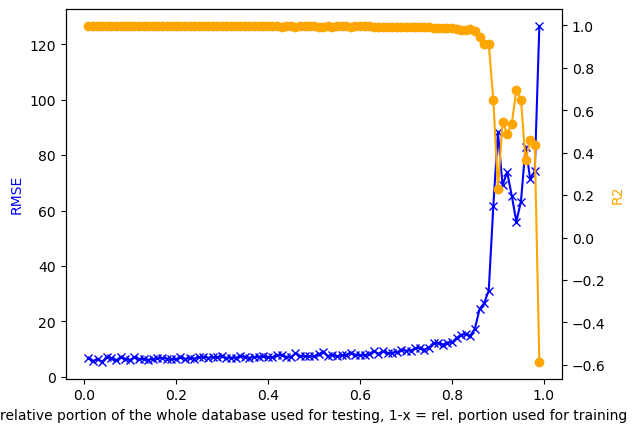

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(sizes, RMSEs, '-x', color='blue', label='RMSE')
ax1.set_xlabel('relative portion of the whole database used for testing, 1-x = rel. portion used for training')
ax1.set_ylabel('RMSE', color='blue')

ax2 = ax1.twinx()
ax2.plot(sizes, R2s, '-o', color='orange', label='R2')
ax2.set_ylabel('R2', color='orange')

#plt.legend()
plt.show()